In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/survey_results_public.csv")

In [3]:
#set qid as index
schema = pd.read_csv("data/survey_results_schema.csv", index_col=0)

In [4]:
schema.tail(5)

,qname,question,force_resp,type,selector
qid,,,,,
QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR
QID290,Frequency_3,Encountering knowledge silos (where one indivi...,NaN,MC,MAVR


# Functions

In [5]:
#create bar chart
def create_bar(names, counts, title):

    fig, ax = plt.subplots(figsize=(20, 5))
    bars = ax.bar(names, counts)
    ax.set_ylabel('Count')
    ax.set_title(title)

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(count, 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 0), 
                    textcoords='offset points',
                    ha='center',
                    va='bottom')
    plt.show()


In [6]:
#count percentage function
def percent(all, count):
    perc = count * 100 / all
    return round(perc, 1)

In [7]:
def create_pie(count, names, text, colors, title):

    fig, ax = plt.subplots(figsize=(5, 10))
    
    # Create a pie chart with both count and percentage values
    wedges, texts, autotexts = ax.pie(count, labels=names, autopct='%1.1f%%', startangle=140, labeldistance=1.05, colors=colors)
    ax.set_title(title)
    
    # Add total count and count values to the top right corner
    ax.text(1.2, 1.2, text, fontsize=12, ha='center', va='center', multialignment='left')
        
    plt.show()

# Largest amount of salary

In [8]:
data[["CompTotal", "DevType"]].nlargest(10, "CompTotal") #read 10 largest salary and their dev type by columns

,CompTotal,DevType
56322,5.000000e+46,Blockchain
18463,1.000000e+21,"Developer, back-end"
43556,1.000000e+16,"Developer, desktop or enterprise applications"
49553,1.000000e+16,Research & Development role
35779,1.000000e+15,NaN
15439,4.567887e+12,Data or business analyst
33078,1.000000e+11,"Developer, full-stack"
19679,2.239672e+10,Developer Experience
56853,1.980000e+10,"Developer, QA or test"
9175,1.840199e+10,Academic researcher


In [9]:
#average, min, max, median of salary, sorted by average salary
grouped_data = data.groupby("Country")
result = grouped_data["CompTotal"].agg(["mean", "median","min", "max"]).sort_values(by="median", ascending=False).head(5)
result

,mean,median,min,max
Country,,,,
Bahamas,5.000000e+46,5.000000e+46,5.000000e+46,5.000000e+46
"Iran, Islamic Republic of...",4.255319e+18,3.840000e+08,0.000000e+00,1.000000e+21
Viet Nam,3.287808e+08,2.000000e+08,5.000000e+02,2.000000e+09
Brunei Darussalam,9.250040e+07,9.250040e+07,8.000000e+02,1.850000e+08
Indonesia,1.796239e+08,8.550000e+07,0.000000e+00,2.009461e+09


In [10]:
#max salary in country, sort with country and max salary 
grouped_data["CompTotal"].agg(["max"]).sort_values(by=["Country", "max"], ascending=True).head(5)

,max
Country,
Afghanistan,9.324644e+08
Albania,9.000000e+06
Algeria,3.600000e+06
Andorra,9.374276e+09
Angola,4.800000e+06


# Coding years

In [11]:
#read and group years of coding
code_years = data["YearsCodePro"].value_counts()
less_five = 0
five_to_ten = 0
ten_to_tw = 0
tw_more = 0

for i in code_years.index:
    if(i != "Less than 1 year" and i != "More than 50 years"):
        i = int(i)
        if(i < 5): less_five += code_years[i]
        elif(5 <= i < 10): five_to_ten += code_years[i]
        elif(10 <= i < 20) : ten_to_tw += code_years[i]
        else: tw_more += code_years[i]
    elif(i == "Less than 1 year"): less_five += code_years[i]
    else: tw_more += code_years[i]

In [12]:
all = less_five + five_to_ten + ten_to_tw + tw_more
less_five = percent(all, less_five)
five_to_ten = percent(all,five_to_ten)
ten_to_tw = percent(all,ten_to_tw)
tw_more = percent(all,tw_more)

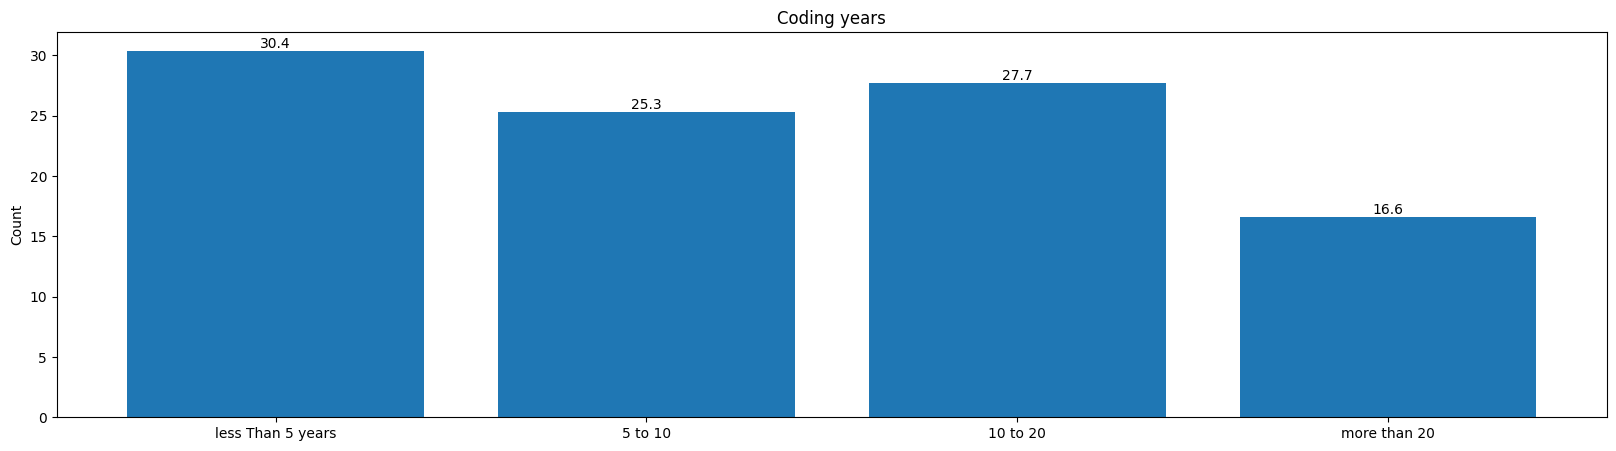

In [13]:
names_coding = ["less Than 5 years", "5 to 10", "10 to 20", "more than 20"]
counts_coding = [less_five, five_to_ten, ten_to_tw, tw_more]
title_coding = "Coding years"

create_bar(names_coding, counts_coding, title_coding)

# Employment

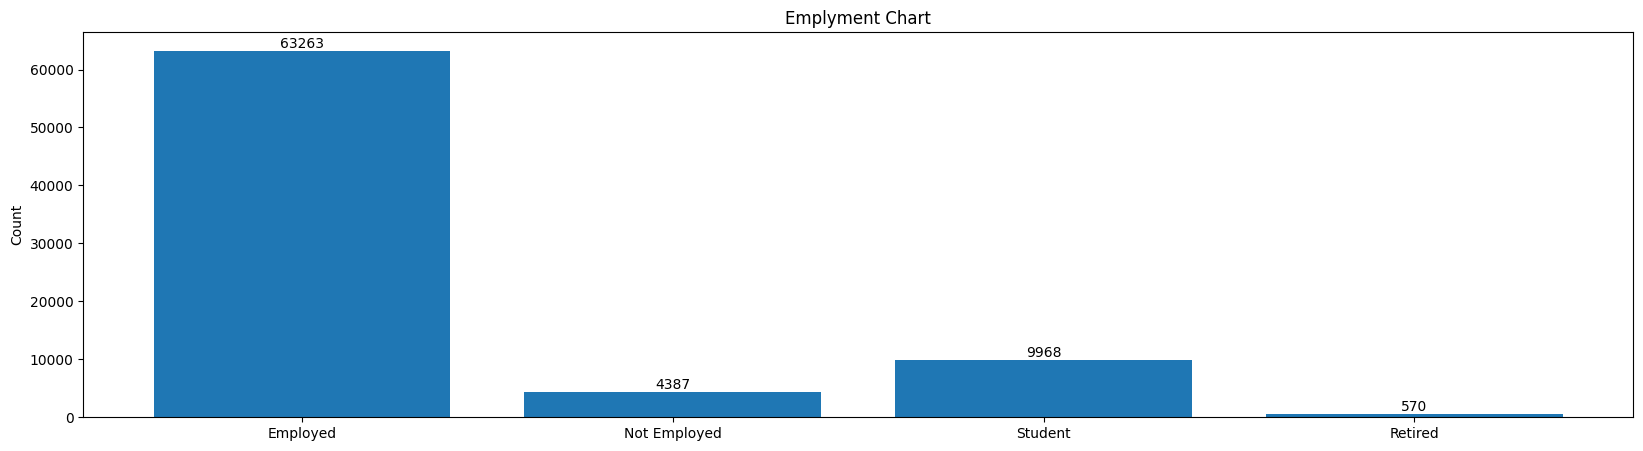

In [14]:
#split employment data to count employed, not employed, student and retired 

employment = data["Employment"].str.split(",").explode().str.strip()
employment_counts = employment.value_counts()
employed = employment_counts.loc["Employed"]
retired = employment_counts.loc["Retired"]
student = employment_counts.loc["Student"]
not_emplyed = employment_counts.loc["Not employed"]

names_e = ["Employed", "Not Employed", "Student", "Retired"]
counts_e = [employed, not_emplyed, student, retired]
title_e = "Emplyment Chart"

create_bar(names_e, counts_e, title_e)

# Employment with Degree

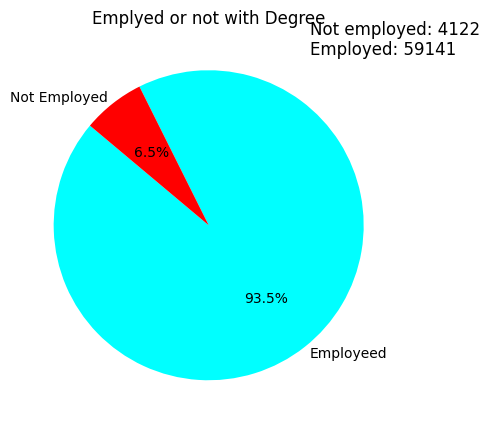

In [15]:
#count employed respondents with degree and  without degree
degree_employed = data["EdLevel"].str.contains("degree",  na=False) & data["Employment"].str.match(r'^Employed', na=False)
ndegree_employed = ~data["EdLevel"].str.contains("degree",  na=False) & data["Employment"].str.match(r'^Employed', na=False)

names_degrEmp = ["Employeed", "Not Employed"]
counts_degrEmp = [degree_employed.value_counts()[0], ndegree_employed.value_counts()[1]]

colors_one = ["cyan", "red"] 
text_one = f'Not employed: {counts_degrEmp[1]}\nEmployed: {counts_degrEmp[0]}'
title_one = "Emplyed or not with Degree"

create_pie(counts_degrEmp, names_degrEmp, text_one, colors_one, title_one)


# Popular languages

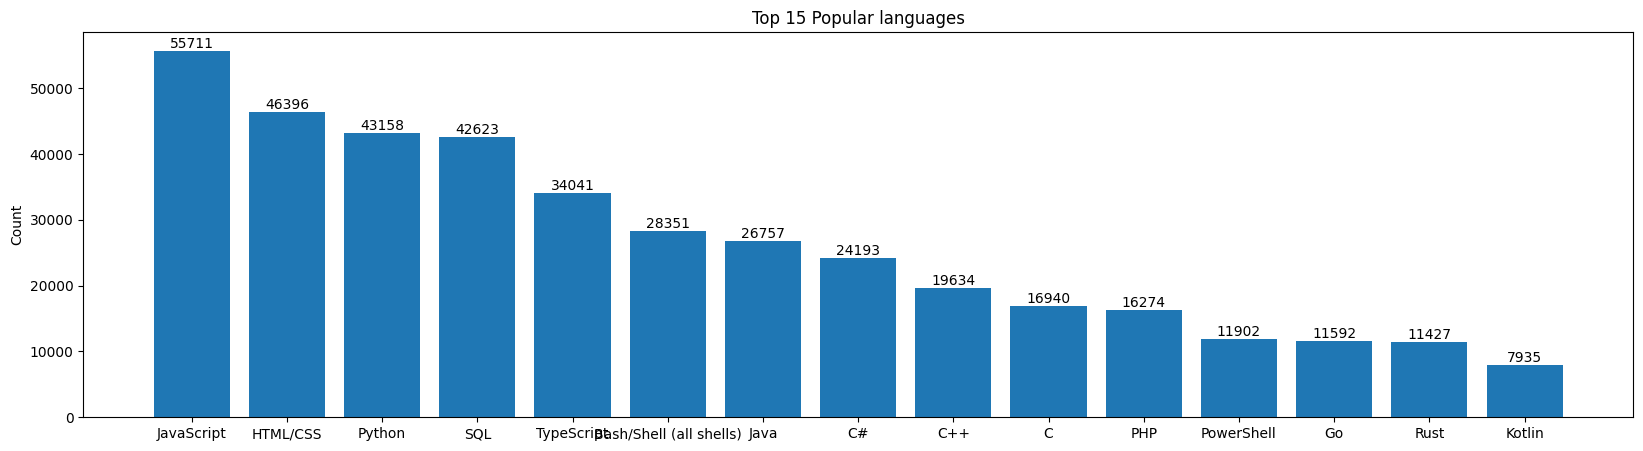

In [16]:
#count languages and create bar chart for top 14
popular_languages = data["LanguageHaveWorkedWith"].str.split(";").explode().str.strip()

language_counts = popular_languages.value_counts().head(15)
names_languages = language_counts.index
value_languages = language_counts.values
title_languages = "Top 15 Popular languages"


create_bar(names_languages, value_languages, title_languages)

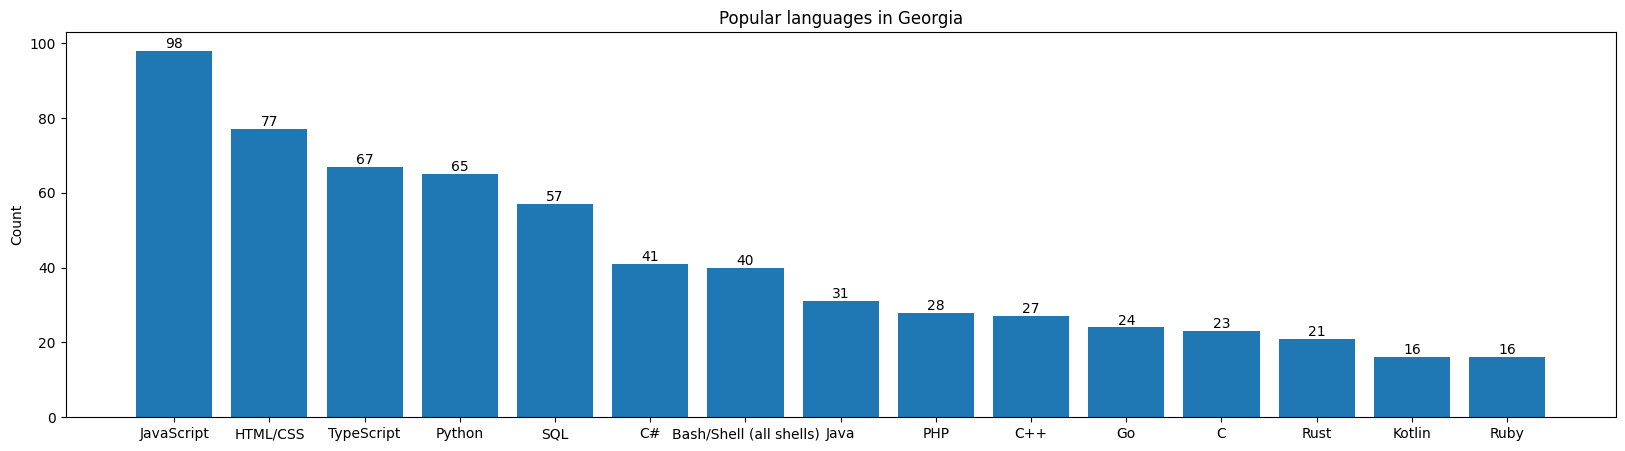

In [17]:
#Popular languages in georgia
georgia = grouped_data.get_group("Georgia")
languages_geo = georgia["LanguageHaveWorkedWith"] .str.split(";").explode().str.strip()

results_geo = languages_geo.value_counts().head(15)
names_languages_geo = results_geo.index
value_languages_geo = results_geo.values
title_languages_geo = "Popular languages in Georgia"


create_bar(names_languages_geo, value_languages_geo, title_languages_geo)

# Compare Germany to Germany Salary

In [18]:
#get italy and germany salary, calculate max, mean, std
italy_salary = grouped_data["CompTotal"].get_group("Italy")
italy_agg = italy_salary.agg(["max", "mean", "std"])
ger_salary = grouped_data["CompTotal"].get_group("Germany")
ger_agg = ger_salary.agg(["max", "mean", "std"])

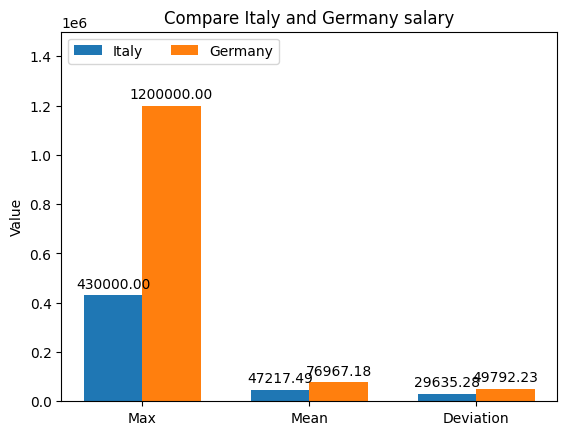

In [19]:
#create grouped bar chart
agg = ("Max", "Mean", "Deviation")
country = {
    'Italy': italy_agg.values,
    'Germany': ger_agg.values,
}

x = np.arange(len(agg))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in country.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.2f', padding=3)  # Format the numbers to display two decimal places
    multiplier += 1

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Compare Italy and Germany salary')
ax.set_xticks(x + width / 2, agg)  # Adjusted the x-axis tick positions
ax.legend(loc='upper left', ncol=2)
ax.set_ylim(0, 1.5e6)  # Adjusted the y-axis limits for better visibility

plt.show()